# BigMart Sales Analysis Project

## Import some important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
from scipy.stats import mode
from sklearn import preprocessing

In [3]:
%matplotlib inline
sns.set()

## Make some functions

In [4]:
def Mode(x):
    return x.mode()[0]

def XY_Labels (x,y):
    X = plt.xlabel(x, fontsize = 15)
    Y = plt.ylabel(y, fontsize = 15)
    return (X,Y)

def label_encoder(b):
    le= preprocessing.LabelEncoder()
    return le.fit_transform(b) 

## Data Wrangling

### Load and discover our data

In [5]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
print(df['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Handling Missing & Null Values using Mean & Mode functions

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace= True)

In [13]:
df['Item_Visibility'].replace(0, np.nan, inplace=True)
df['Item_Visibility'].isna().sum()

526

In [14]:
df['Item_Visibility'].fillna(df['Item_Visibility'].mean(), inplace= True)
df['Item_Visibility'].isna().sum()

0

In [15]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc= lambda x:Mode(x) )
print(outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [16]:
missing_values = df['Outlet_Size'].isnull()
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.226124,0.048730,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Remove Outliers using Box Plot

In [19]:
df['Item_Type_Combined']=df['Item_Identifier'].apply(lambda x:x[0:2])
df['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

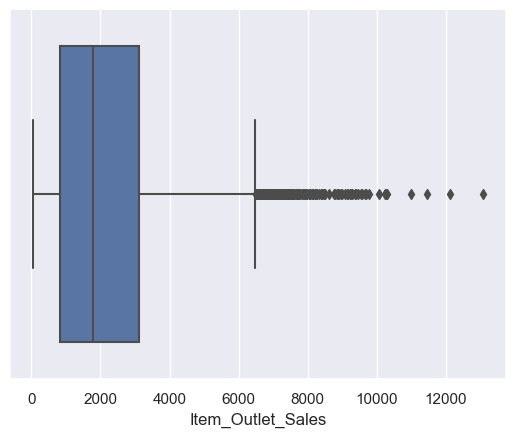

In [20]:
sns.boxplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Type_Combined', ylabel='Item_Outlet_Sales'>

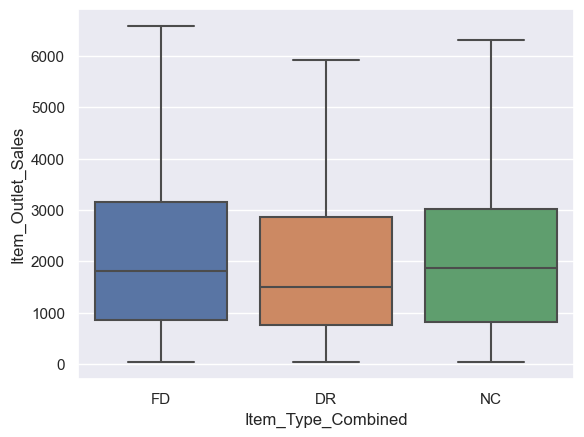

In [21]:
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=df, showfliers=False)

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

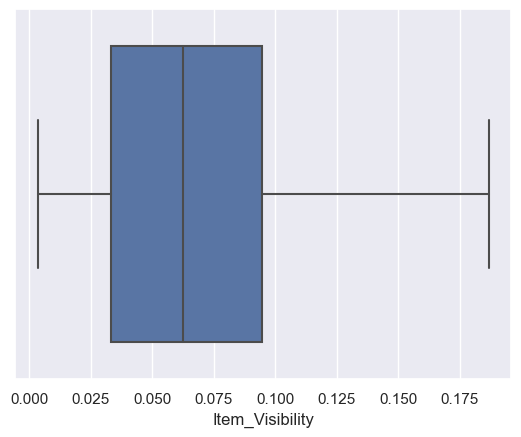

In [22]:
sns.boxplot(df['Item_Visibility'], showfliers=False)

In [23]:
df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.200,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
5,FDP36,10.395,Regular,0.070482,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD


### Using Label Encoder function

In [24]:
#df['Item_Type']= label_encoder(df['Item_Type'])
#df['Item_Type'].unique()

In [25]:
df['Outlet_Identifier']= label_encoder(df['Outlet_Identifier'])
df['Outlet_Location_Type']= label_encoder(df['Outlet_Location_Type'])

In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,4.722281,1997.831867,1.112871,2181.288914
std,4.226124,0.048730,62.275067,2.837201,8.371760,0.812757,1706.499616
min,4.555000,0.003575,31.290000,0.000000,1985.000000,0.000000,33.290000
25%,9.310000,0.033085,93.826500,2.000000,1987.000000,0.000000,834.247400
50%,12.857645,0.062517,143.012800,5.000000,1999.000000,1.000000,1794.331000
75%,16.000000,0.094585,185.643700,7.000000,2004.000000,2.000000,3101.296400
max,21.350000,0.328391,266.888400,9.000000,2009.000000,2.000000,13086.964800


## Exploratory Data Analysis (EDA)

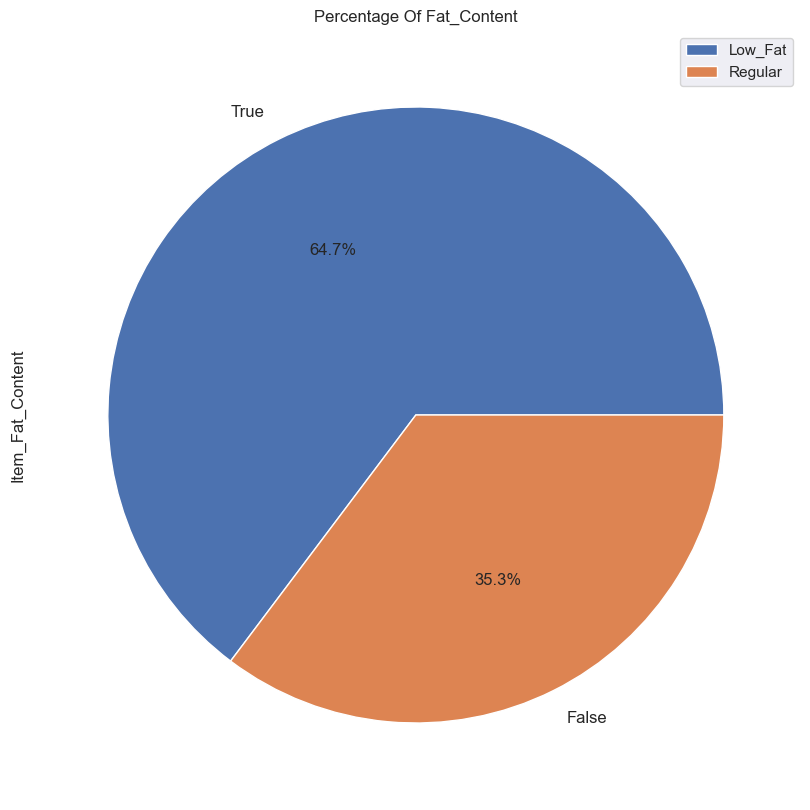

In [27]:
LF = df['Item_Fat_Content'] == "Low Fat"
R = df['Item_Fat_Content'] == "Regular"
Fat_Content = LF.value_counts()
Fat_Content.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12)  
plt.title("Percentage Of Fat_Content")
plt.legend(["Low_Fat", "Regular"])

In [28]:
LF = df['Item_Fat_Content'] == "Low Fat"
R = df['Item_Fat_Content'] == "Regular"
LF.value_counts()

True     5517
False    3006
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Top six Item types in terms of total sales')

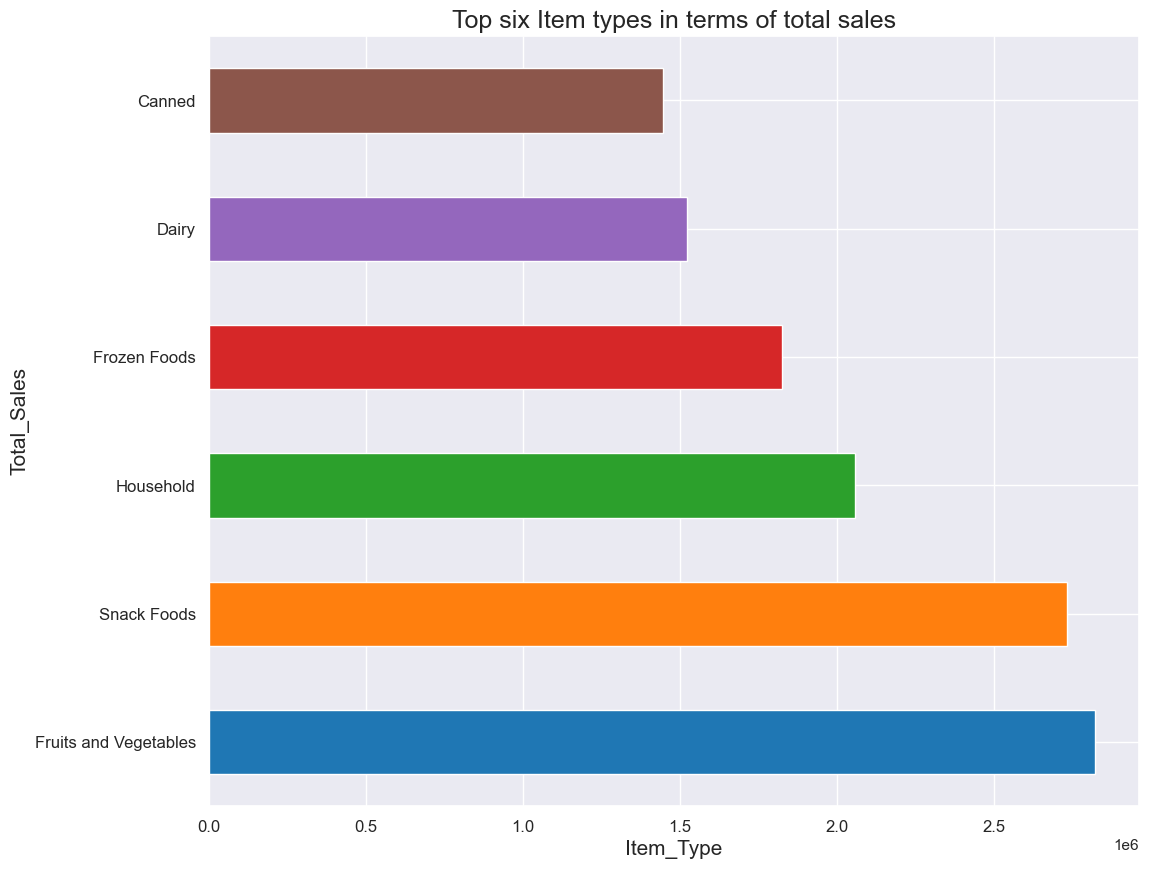

In [29]:
df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending= False)[:6].plot(kind='barh', figsize = (12,10), fontsize = 12, color = mcolors.TABLEAU_COLORS)
XY_Labels ("Item_Type","Total_Sales")
plt.title("Top six Item types in terms of total sales", fontsize = 18)

(Text(0.5, 0, 'Item_MRP'), Text(0, 0.5, 'Frequency'))

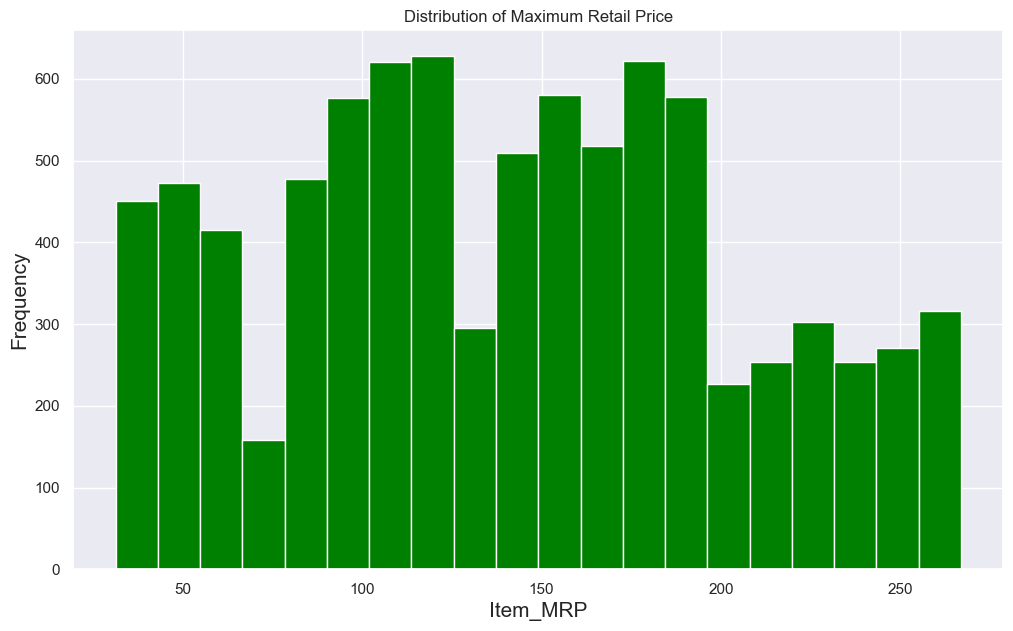

In [30]:
plt.figure(figsize = (12, 7))
plt.hist(df['Item_MRP'], bins = 20, color='green')
plt.title('Distribution of Maximum Retail Price')
XY_Labels ("Item_MRP","Frequency")

(Text(0.5, 0, 'Item_MRP'), Text(0, 0.5, 'Item_Outlet_Sales'))

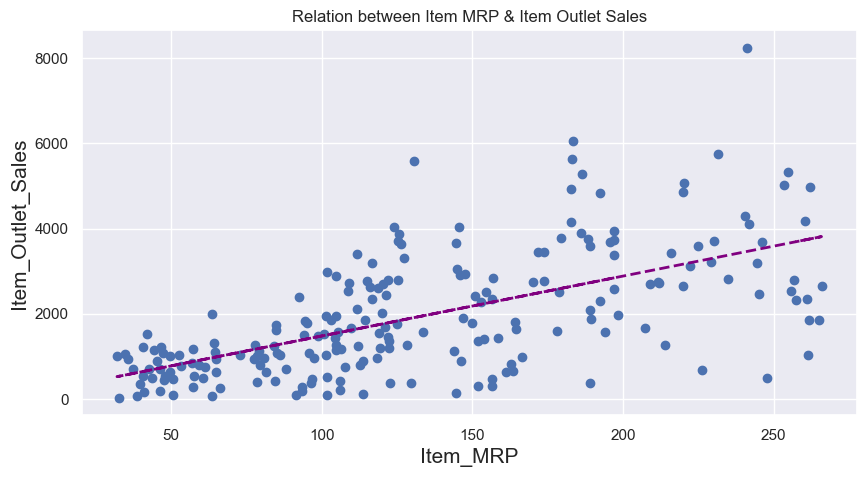

In [31]:
df1 = df.sample(frac =.025)
plt.figure(figsize = (10,5))
x = df1['Item_MRP']
y = df1['Item_Outlet_Sales']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="purple", linewidth=2, linestyle="--")
plt.title('Relation between Item MRP & Item Outlet Sales')
XY_Labels ("Item_MRP","Item_Outlet_Sales")

Text(0.5, 1.0, 'The Maximum Retail Price for each Outlet Size')

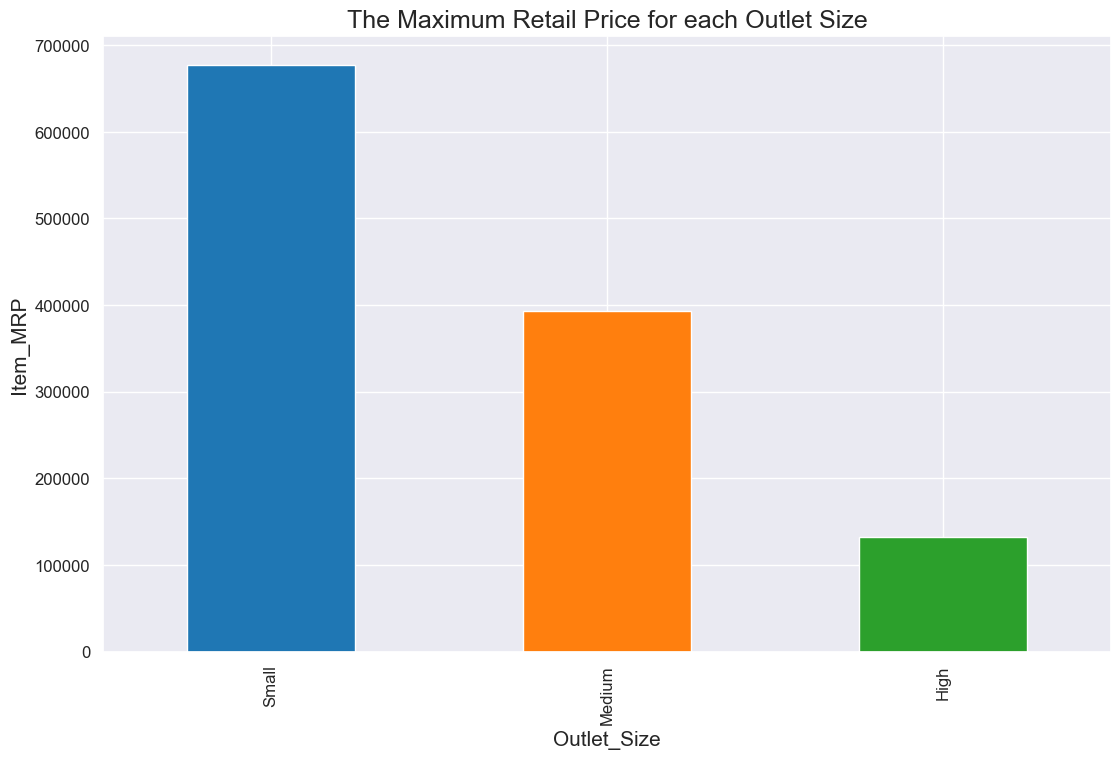

In [32]:
df.groupby('Outlet_Size')['Item_MRP'].sum().sort_values(ascending= False).plot(kind='bar', figsize = (13,8), fontsize = 12, color = mcolors.TABLEAU_COLORS)
XY_Labels ("Outlet_Size","Item_MRP")
plt.title("The Maximum Retail Price for each Outlet Size", fontsize = 18)

Text(0.5, 1.0, 'Average Sales for each Outlet Type')

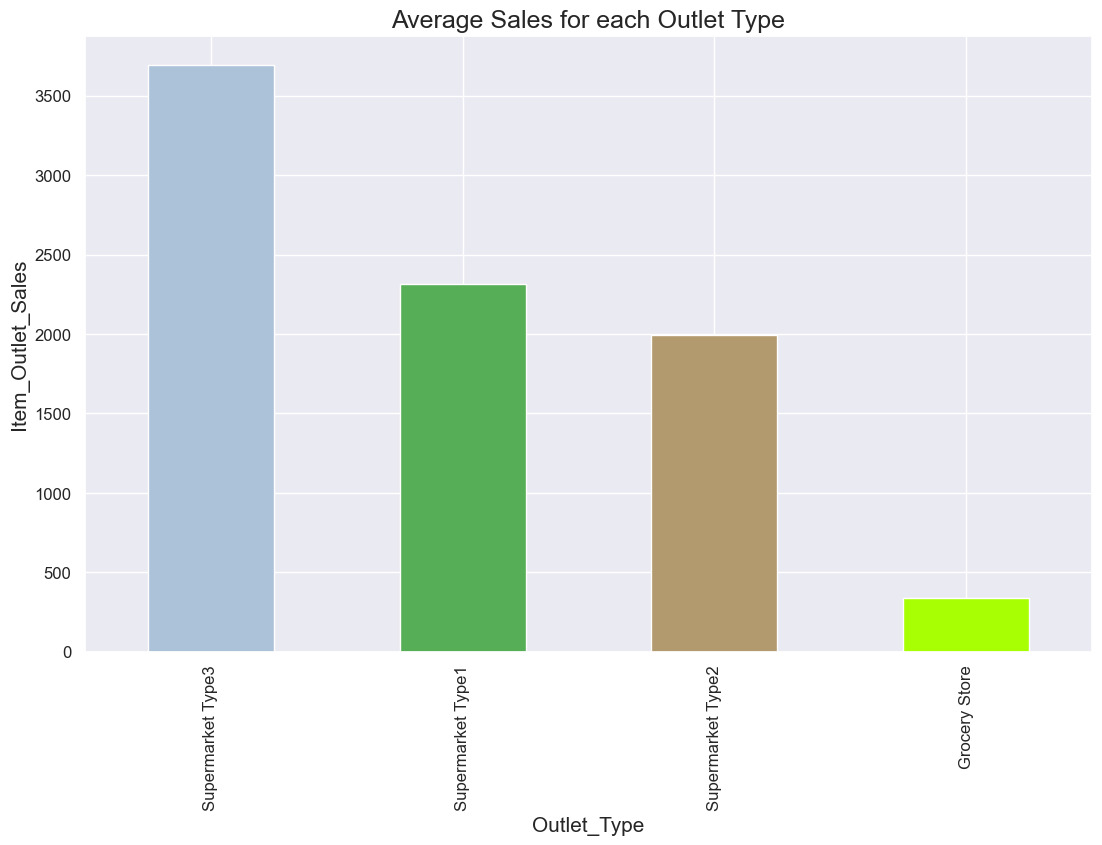

In [33]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending= False).plot(kind='bar', figsize = (13,8), fontsize = 12, color = mcolors.XKCD_COLORS)
XY_Labels ("Outlet_Type","Item_Outlet_Sales")
plt.title("Average Sales for each Outlet Type", fontsize = 18)